# TimesML
---
TimesML 是為時間序列數據分析和機器學習而開發的，此套件目的是提供API給開發人員與資料科學家，能夠輕鬆的對時間序列數據建立模型，進行分析與預測。我們計畫未來提供更多機器學習模型，感謝您的支持。

PyPI: https://pypi.org/project/TimesML/

Github: https://github.com/leodflag/TimesML
#.

## 下載 TimesML

In [ ]:
!pip install TimesML

我們先介紹套件TimeSeriesAnalysis底下的三個模組

### ProcessData
用來處理時間序列數據，包括取得、儲存資料，也有用來建立Model所需資料格式的函式。

### Model
內含各種時間序列的分析預測模型，如能觀察股票價格整體性趨勢的簡單移動平均，與利用序列資料自身的規律以預測未來的自迴歸模型等等。

### Chart
可將時間序列數據視覺化，讓人直觀的了解數據的歷史走勢、與自身前期資料的關係，以及模型預測後的視覺化結果等等。
# .

# 開始使用TimesML
---
我們以2020/1到2020/10的20個國家COVID19每日新增確診人數資料為分析目標，一步步了解TimesML的用法。

### Note
若是使用自己電腦實作，所需資料網址如下，請自行下載

https://github.com/leodflag/TimesML/blob/master/test_data/g20_new_c.csv


---

* Test data set : g20_new_c.csv
** Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1
#.

## import 模組

In [ ]:
import TimeSeriesAnalysis.ProcessData as Data
import TimeSeriesAnalysis.Model as Model
import TimeSeriesAnalysis.Chart as Chart

## 基礎設定

In [ ]:
save_path = 'US'   # 存檔路徑
chart = Chart.chart('US') #  建立物件chart, 輸入的文字為時間序列數據名稱，之後畫的圖都會有此標題

## 讀檔

In [ ]:
data = Data.read_file(path="https://raw.githubusercontent.com/leodflag/TimesML/master/test_data/g20_new_c.csv", col_name='US')

這邊就使用到了ProcessData的讀檔函式，path為目標檔案路徑,col_name是欄位名稱，因此從檔案取得的格式會是一維數據。

In [ ]:
print(data.head) # 印出前後5筆

<bound method NDFrame.head of date
1/22/20         0.0
1/23/20         0.0
1/24/20         1.0
1/25/20         0.0
1/26/20         3.0
             ...   
10/17/20    57519.0
10/18/20    48210.0
10/19/20    58387.0
10/20/20    60315.0
10/21/20    62735.0
Name: US, Length: 274, dtype: float64>


## Chart畫圖: 歷史趨勢線圖


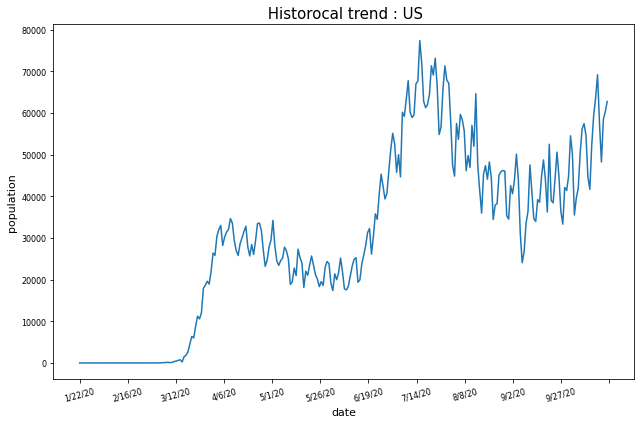

Saved successfully (historocal trend). File path = US/Historocal_Trend_US.png


In [ ]:
chart.historocal_trend_line_chart(data, save_path, xlabel='date', ylabel='population') # save_path：所有的圖都會自動儲存到指定路徑, xlabel, ylabel：x軸、y軸的標籤

可以看到美國的COVID19每日新增確診人數。

#.
## Chart 小知識

Chart在建立物件時會固定一張圖的輸出尺寸，因此圖的尺寸不設定的話會使用預設值。

原本建立Chart物件時的參數如下：

chart(title_times_data: str='times_data', figsize_length: int=9, figsize_width: int=6, 
fontsize_title: int=15, fontsize_x_y: int=8, fontsize_x_y_label: int=11)
# .

## 來個統計分析圖
觀察時間序列數據的性質

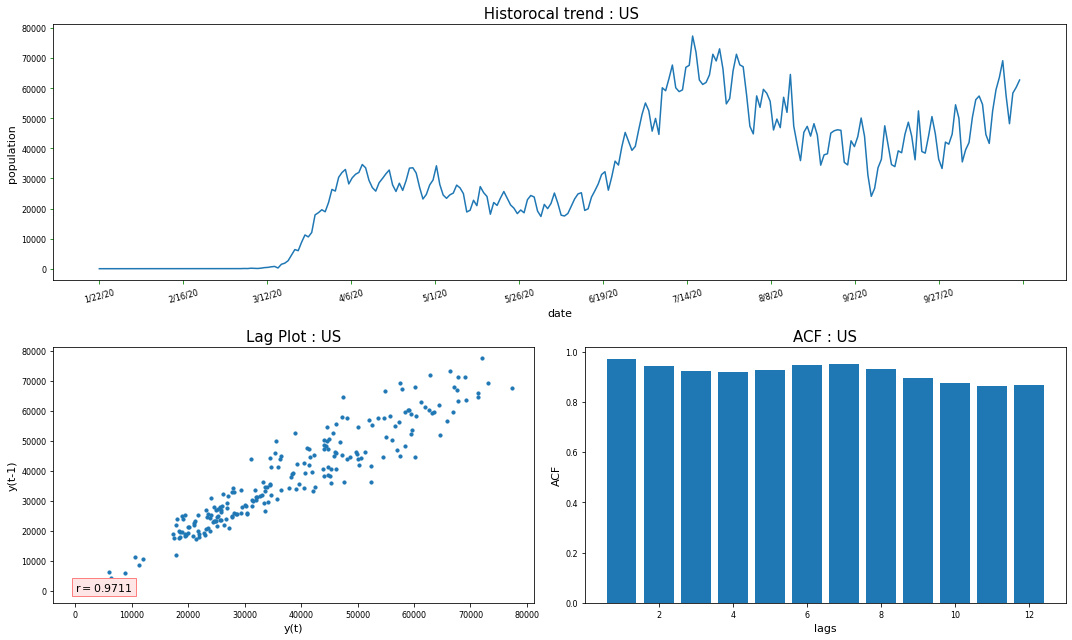

Saved successfully (statistics_infographic). File path = US/statistics_infographic_US.png


In [ ]:
chart.statistics_infographic(data, file_path=save_path, lags=12, xlabel='date', ylabel='population') # lags為落後期數(白話是前幾期)，在此圖功能為提供ACF計算期數

## Lag Plot

原本是散佈圖，可以用來觀察自變數x與應變數y的關係，但Lag Plot這張圖專門來看時間序列數據當期與前一期數據之間的關係，

y(t):當期，y(t-1):前一期


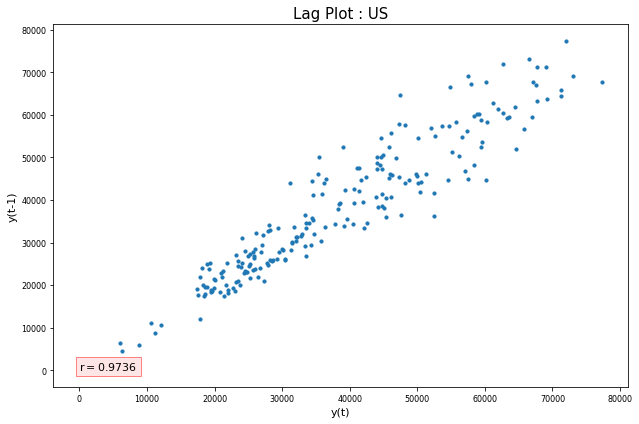

Saved successfully (lag plot). File path = US/Lag_Plot_US.png


In [ ]:
chart.lag_plot(data, save_path)

圖中的 $r$ 為相關係數，可以了解兩變數之間的關係。
# .



## 當期與前一期數據是啥？

In [ ]:
lag_data = Data.create_ar_data(data, lags=2)
print(lag_data.head)

<bound method NDFrame.head of                            t-2        t-1          t
date                                                
2019-12-05 14:30:00  64.862503  65.434998  66.394997
2019-12-06 14:30:00  65.434998  66.394997  67.677498
2019-12-09 14:30:00  66.394997  67.677498  66.730003
2019-12-10 14:30:00  67.677498  66.730003  67.120003
2019-12-11 14:30:00  66.730003  67.120003  67.692497
2019-12-12 14:30:00  67.120003  67.692497  67.864998
2019-12-13 14:30:00  67.692497  67.864998  68.787498
2019-12-16 14:30:00  67.864998  68.787498  69.964996
2019-12-17 14:30:00  68.787498  69.964996  70.102501
2019-12-18 14:30:00  69.964996  70.102501  69.934998
2019-12-19 14:30:00  70.102501  69.934998  70.004997
2019-12-20 14:30:00  69.934998  70.004997  69.860001
2019-12-23 14:30:00  70.004997  69.860001  71.000000
2019-12-24 14:30:00  69.860001  71.000000  71.067497
2019-12-26 14:30:00  71.000000  71.067497  72.477501
2019-12-27 14:30:00  71.067497  72.477501  72.449997
2019-12-30 14:30

欄位t是指date當期(當天)的資料，欄位t-1是data前一期(落後一期、前一天)的資料，因此以date所在的橫列來看，會存在當期與前一期的資料，此種資料設計方便運算



In [ ]:
print(lag_data['t-1'].head)

<bound method NDFrame.head of date
1/25/20         1.0
1/26/20         0.0
1/27/20         3.0
1/28/20         0.0
1/29/20         0.0
             ...   
10/17/20    69156.0
10/18/20    57519.0
10/19/20    48210.0
10/20/20    58387.0
10/21/20    60315.0
Name: t-1, Length: 271, dtype: float64>


## 介紹Math.Statistics
##### .
### **注意事項：數學符號並未統一**

In [ ]:
import Math.Statistics as math

## Pearson product-moment correlation coefficient 皮爾森相關係數
[表示兩變數之間的相關程度，其值介於-1與1之間，定義為兩個變數的共變異數除以它們標準差的乘積](https://zh.wikipedia.org/wiki/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%A7%AF%E7%9F%A9%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0)

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/8b0d0608b5f85d24a9c572f8d1b5769289664dfb)

* 樣本皮爾森相關係數
$$r = \frac{ n(\sum_{i=0}^{n} x_{i}y_{i})-(\sum_{i=0}^{n} x_{i})(\sum_{i=0}^{n} y_{i})}{\sqrt {[n(\sum_{i=0}^{n} x_{i}^{2})-(\sum_{i=0}^{n} x_{i})^{2}][n(\sum_{i=0}^{n} y_{i}^{2})-(\sum_{i=0}^{n} y_{i})^{2}] }}$$

In [ ]:
math.correlation_coefficient(lag_data['t'], lag_data['t-1'])

0.9731975544622815

## ACF chart
透過math.ACF()不斷計算當期數據與遞延期數數據之間的ACF，可以畫出以下的圖，x軸為遞延期數，y軸為ACF數值，以此張圖來看，US的COVID19每日新增確診人數與自身的前期新增確診人數皆具有高度相關。

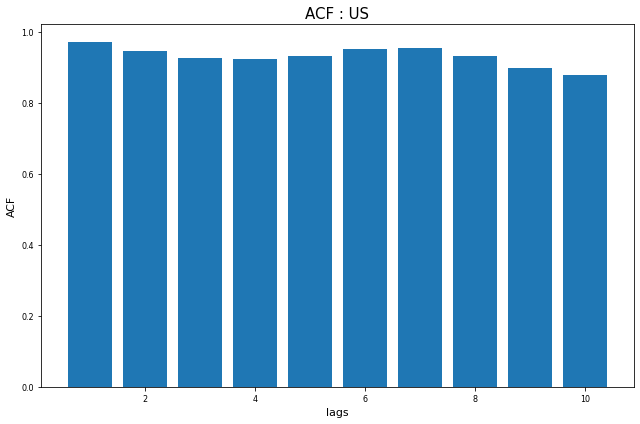

Saved successfully (ACF). File path = US/ACF_US.png


In [ ]:
chart.ACF_chart(data, file_path=save_path, lags=10)

## ACF 自相關函數
[也叫序列相關，是一個訊號於其自身在不同時間點的互相關，常用於訊號處理中，用來分析函數或一系列值，如時域訊號。](https://zh.wikipedia.org/wiki/%E8%87%AA%E7%9B%B8%E5%85%B3%E5%87%BD%E6%95%B0)

$$ \rho_k =  \frac{Cov(X_t, X_{t-k})} {\sigma_{X_t}{\sigma_{X_{t-k}}} }  $$

In [ ]:
acf_lag_data = math.ACF(lag_data['t'], lag_data['t-1'])
print(acf_lag_data)

0.9731975544622808


## 時間序列數據的另一個觀察方法：簡單移動平均
[簡單移動平均](https://zh.wikipedia.org/wiki/%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87)可以用來觀察數據的歷史趨勢，為此我們使用Model模組中的SimpleMovingAverage。

$$ \bar P_{SM}= \frac{P_M+P_{M-1}+...+P_{M-(n-1)}} {n} $$



In [ ]:
sma_model = Model.SimpleMovingAverage(windows=10) # windows為移動窗格，一次累積10筆資料計算平均
sma_model.fit(data)

## 簡單移動平均圖
簡單移動平均的計算方式會使數據歷史波動狀況趨於緩和，如下圖'SMA(7)'的綠線較歷史趨勢灰線平穩。綠線的每個資料點皆是今日加前6天平均的結果，因此可以將美國的每日確診人數轉成較為長期的趨勢，用以觀察疫情控制情況。

Model物件在計算完模型後，可使用屬性的方式取得內部資料，如下圖的sma_model.sma_result是經過簡單移動平均計算後的數據。

chart.line_chart()能放入兩個不同長度的一維資料，可自訂圖的標題，存成圖檔時也會直接存為檔名。

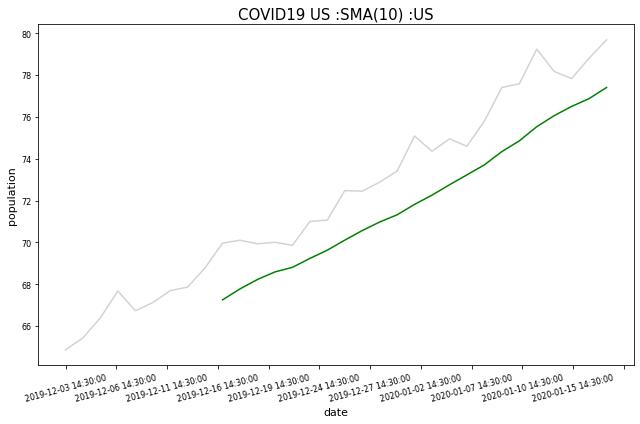

Saved successfully (historocal trend analysis). File path = US/COVID19 US :SMA(10)_US_line_chart.png


In [ ]:
chart.line_chart(data, sma_model.sma_result, chart_title='COVID19 US :SMA(10)',file_path=save_path, xlabel='date', ylabel='population')

#.
## 模型預測
透過以上的統計圖分析後了解美國的COVID19每日新增確診人數的歷史狀態，若要預測美國未來一個月的新增確診人數（好準備醫療資源等用途），可以使用Model中的自迴歸模型進行預測。
# .
## 切分資料集成訓練集與測試集
模型使用訓練集進行訓練，測試集來測試模型是否能對未來的未知情況進行預測。

In [ ]:
train, test = Data.split_data(data, ratio=0.8) # 80%的資料當訓練集訓練模型，剩下的20%為測試集檢視模型能力

#.
## AutoRegressive自我迴歸模型
最常見的時間序列模型之一，其假設變數會受到變數前期影響，因此將時間序列數據自己的歷史數據當作解釋變數。簡單的只使用前一期資料做解釋變數，就稱作[一階自我迴歸模型AR(1)](http://homepage.ntu.edu.tw/~sschen/Book/Slides/Ch3AR.pdf)。

$$ AR(1):y_t=\beta_0+\beta_1 y_{t-1}+ \varepsilon_t $$

$$ AR(p):y_t=\beta_0+\beta_1 y_{t-1}+ \beta_2 y_{t-2}+ ...+\beta_p y_{t-p}+ \varepsilon_t $$


In [ ]:
model_1 = Model.AutoRegressive(lags=2) # 建立AR(2)模型
model_1.fit(train) # 訓練模型
model_1.predict(test, pure_test_set_predict=True) # 進行預測

###只需三行便可完成AR(2)模型的建立、訓練、預測！
 
設計pure_test_set_predict這個參數，是因為AR模型使用前期資料進行當期預測，模型的預測資料數必定會少於丟入的測試集資料數，因此pure_test_set_predict=True，表示只使用測試集進行預測;若為False，會使用測試集的資料當作預測的過去資料，而不會損耗測試集的資料。


In [ ]:
print(len(model_1.test_data),', ',len(model_1.test_predict))

53 ,  53


In [ ]:
model_1.predict(test, pure_test_set_predict=False)
print(len(model_1.test_data),', ',len(model_1.test_predict))

55 ,  55


丟入model_1模型訓練與預測後，會產生各種參數可以取出數值，上面的model_1.test_data就是在模型預測過程中產生的測試資料，其他還有很多，比如model_1.test_error(使用測試集的預測誤差)、 model_1.train_predict(使用訓練集的預測資料)等等

In [ ]:
model_2 = Model.AutoRegressive(lags=20)
model_2.fit(train)
model_2.predict(test,pure_test_set_predict= False) # 跟model_1設同樣的條件

# .
## 比較兩種模型
訓練好的模型資訊（訓練集預測誤差、測試集預測誤差等等）都包含在Model物件裡，使用chart.forecast_result_group_chart直接看看

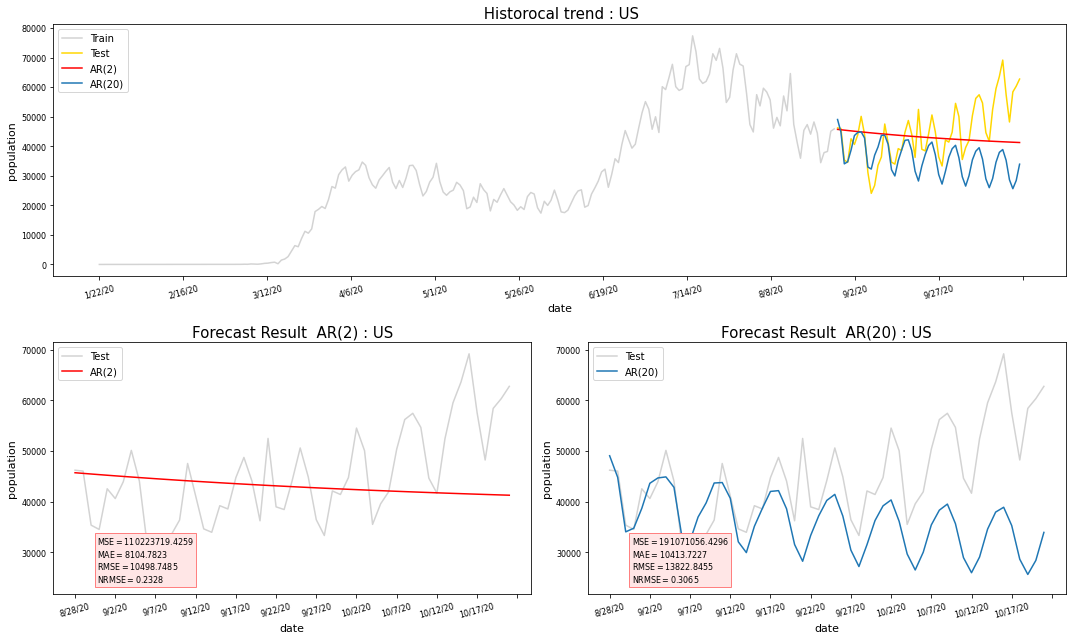

Saved successfully (forecast result group chart). File path = US/forecast_result_group_chart_US.png


In [ ]:
chart.forecast_result_group_chart(train, test, model_1, model_2, file_path=save_path, 
model_1_name='AR(2)', model_2_name='AR(20)', xlabel='date', ylabel='population')

視覺上可以很明顯的看到AR(2)預測結果相當直線條，非常的線性迴歸，AR(20)預測則較能捕捉到序列資料的浮動，直觀來說參考過去的資料多，代表訓練模型較能學習到時間序列資料的隱藏規則。

圖內的MSE、MAE、RMSE、NRMSE都是Model內儲存數值，因此比較結果，都是AR(20)模型預測效果較好
# .


In [ ]:
print(model_1.test_error) # 按順序是MSE、MAE、RMSE、NRMSE

[110223719.42590871, 8104.78225002617, 10498.748469503817, 0.232788214401415]


In [ ]:
print(model_2.test_error) # 按順序是MSE、MAE、RMSE、NRMSE

[191071056.4295903, 10413.722679756596, 13822.845453436506, 0.30649324730457883]


## 一連串的迴歸模型評測指標
#.
## MSE 均方誤差

真實值減去預測值後再平方
$$\frac{1}{m} \sum_{i=0}^{m} (y_i- \hat y_{i})^{2} $$



In [ ]:
mse = math.mean_square_error(model_1.test_data, model_1.test_predict)
mse

110223719.42590871


## MAE 平均絕對誤差

真實值減去預測值後再取絕對值
$$\frac{1}{m} \sum_{i=0}^{m}| (y_i- \hat y_{i})| $$


In [ ]:
mae = math.mean_absolute_error(model_1.test_data, model_1.test_predict)
mae

8104.78225002617


## RMSE 均方根誤差

MSE開根號
$$ \sqrt{\frac{1}{m} \sum_{i=0}^{m} (y_i- \hat y_{i})^{2}} $$


In [ ]:
rmse = math.root_mean_squard_error(model_1.test_data, model_1.test_predict)
rmse

10498.748469503817


## NRMSE 正規化方均根差
[對RMSE進行正規化有助於在不同規模的數據集或模型之間進行比較](https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/)



$$NRMSE = \frac{RMSE}{y_{max}-y_{min}}$$
$$$$
$$ = \frac{ \sqrt{\frac{1}{m} \sum_{i=0}^{m} (y_i- \hat y_{i})^{2}} }{y_{max} - y_{min}} $$
####.
## 實際遇到的問題
A:
有可能發生A模型的RMSE等等數值皆小於B模型，但是B模型在NRMSE卻小於A模型嗎？

Q:
有的，這是因為NRMSE考量到了模型使用的不同數據可能天差地遠，假如A模型須預測人口，B模型僅須預測股價，A模型計算的數值動輒百萬人次，若比RMSE一定很大，B模型所計算的股價波動也無法到達百萬，若比RMSE會很輕鬆就贏。但NRMSE正規化了RMSE後，A模型的預測能力可能會比B模型還要好，也就是NRMSE較小，A模型錯估上千人次在百萬人次裡顯的微不足道，B模型的小誤差1元反而會因為股價波動在10元左右而被放大。



In [ ]:
nrmse = math.normalized_mean_squard_error(model_1.test_data, model_1.test_predict)
nrmse

0.232788214401415

## 如何進一步判斷迴歸模型的解釋能力？
#####.
## coefficient of determination 決定係數
衡量應變數的變異中可由自變數解釋部分所占的比例，可用來判斷統計模型解釋力（又稱判定係數）。

[對於簡單線性回歸而言，決定係數為樣本相關係數的平方。[4]當加入其他回歸自變量後，決定係數相應地變為多重相關係數的平方。](https://zh.wikipedia.org/wiki/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0)
#####.
[參考教材：高科大應用平台：判定係數](http://eschool.kuas.edu.tw/tsungo/Publish/14%20Simple%20linear%20regression%20analysis.pdf)

* 簡單線性迴歸的決定係數
$$ R^2 = \left( \frac{ n(\sum_{i=0}^{n} x_{i}y_{i})-(\sum_{i=0}^{n} x_{i})(\sum_{i=0}^{n} y_{i})}{\sqrt {[n(\sum_{i=0}^{n} x_{i}^{2})-(\sum_{i=0}^{n} x_{i})^{2}][n(\sum_{i=0}^{n} y_{i}^{2})-(\sum_{i=0}^{n} y_{i})^{2}] }} \right)^2$$
#####.

* 線性迴歸的決定係數
$$ r^{2}=1-\frac {SSE}{SST}$$
#####.



* 平均觀察值
$$ \bar y = \frac{1}{n} \sum_{i-0}^n y_i$$

* $SS_{tot}(SST)$ 總變異
** 實際觀察值與平均觀察值之間的差異平方和
$$ \sum_{i=0}^{n}(y_i-\bar y)^2 $$
#####.

* $SS_{reg}(SSR)$ 迴歸項平方和
** 可解釋的變異
** 迴歸預測值與平均觀察值之間的差異平方和
$$ \sum_{i=0}^{n}(\hat y_i-\bar y)^2 $$

#####.
* $SS_{res}(SSE)$ 殘差平方和
** 不可解釋的變異或隨機變異
** 實際觀察值與迴歸預測值之間的差異平方和
$$ \sum_{i=0}^{n}(y_i-\hat y_i)^2 $$
** 有感覺的人應該可以發現，這公式就是常算的MSE
#####.

#####.
* 總變異 ＝ 可解釋變異+不可解釋變異

$$ SST = SSR + SSE$$
#####.


* 線性迴歸的決定係數
$$R^2 = \frac {SSR}{SST} = \frac {SST-SSE}{SST}=1-\frac {SSE}{SST}$$

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png)

決定係數$ r^{2}=1-{\frac {\color {blue}{SSE}}{\color {red}{SST}}}$示意圖 線性回歸（右側）的效果比起平均值（左側）越好，決定係數的值就越接近於1。 藍色正方形表示不可解釋變異， 紅色正方形數據表示總變異。

In [ ]:
r_2 = math.coefficient_of_determination(train,model_1.test_data, model_1.test_predict)
r_2

0.7368227354010427

## 以上為美國COVID19每日新增確診人數資料的TimesML簡單分析版本
#####.

## ProcessData.get_data_yahoo
可以用爬蟲從yahoo finance取得想要的股票、貨幣歷史資料，並且自動儲存成檔案。
用法是輸入股票ID、開始日期、結束日期、存檔格式（支援txt,csv）、資料頻率（日資料、周資料、月資料、年資料），成功爬取時會出現Crawl successfully。
自動存檔功能是為了不要超過yahoo finance的爬取上限。

---


* Use requests crawl yahoo finance stock price
 * FinLab. 超簡單台股每日爬蟲教學. Retrieved July 22, 2020, from https://www.finlab.tw/超簡單台股每日爬蟲教學

In [ ]:
Data.get_data_yahoo(stock_id='AAPL', start_period='2019 12 3', end_period=' 2020 1,18', file_format='csv', frequency='day')

Crawl successfully
Saved successfully (get data yahoo). File path = AAPL/AAPL_day.csv


In [ ]:
data = Data.read_file(path='AAPL/AAPL_day.csv', col_name='close')

## chart.historocal_trend_line_chart
APPLE公司的股價走勢


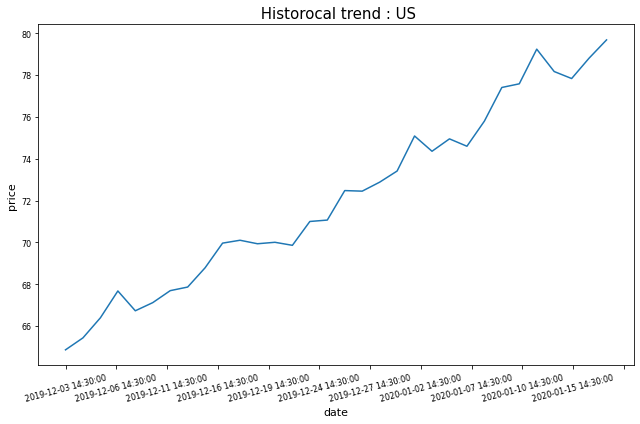

Saved successfully (historocal trend). File path = AAPL/Historocal_Trend_US.png


In [ ]:
chart.historocal_trend_line_chart(data, file_path='AAPL', xlabel='date', ylabel='price')

## TimesML基礎用法介紹完畢